## Import Dependencies

In [72]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt 

## Load In Dataset

In [73]:
df = pd.read_csv('../Datasets/Acumeal_New_Recipe_Database.csv')
df = df.drop('Healthy Diet Now', axis=1)
df.head()

,Age,Gender,Any_Allergies,Workout_Often,High_BP,Diabetes,Build_Muscle,Lose_Weight,Often_Hungry,Eat_Snacks,Mealplan
0,22,Male,Yes,Yes,No,No,Yes,No,Yes,Yes,2
1,40,Female,No,No,Yes,Yes,No,No,Yes,Yes,4
2,16,Male,No,No,No,No,Yes,No,Yes,No,2
3,30,Female,No,Yes,No,No,No,Yes,No,No,3
4,60,Male,Yes,Yes,Yes,No,No,Yes,No,Yes,0


## Data Exploratory Analysis 

In [74]:
len(df)

224

In [75]:
df['Mealplan'].value_counts()

3    60
4    45
5    31
0    31
2    30
1    27
Name: Mealplan, dtype: int64

In [76]:
df.Age.mean()

37.607142857142854

In [77]:
df.dtypes

Age               int64
Gender           object
Any_Allergies    object
Workout_Often    object
High_BP          object
Diabetes         object
Build_Muscle     object
Lose_Weight      object
Often_Hungry     object
Eat_Snacks       object
Mealplan          int64
dtype: object

In [8]:
# cd = {'high': 1, 'low': 0}
# df['Mealplan'].replace(cd, inplace=True)

In [9]:
df.head(2)

,Age,Gender,Any_Allergies,Workout_Often,High_BP,Diabetes,Build_Muscle,Lose_Weight,Often_Hungry,Eat_Snacks,Mealplan
0,22,Male,Yes,Yes,No,No,Yes,No,Yes,Yes,2
1,40,Female,No,No,Yes,Yes,No,No,Yes,Yes,4


## Turn Categories Into Numbers

In [10]:
X = df.drop('Mealplan', axis=1)
y = df['Mealplan']

In [11]:
from sklearn.preprocessing import LabelEncoder

le_workout_often = LabelEncoder()
le_gender = LabelEncoder()
le_high_bp = LabelEncoder()
le_diabetes = LabelEncoder()
le_build_muscle = LabelEncoder()
le_lost_weight = LabelEncoder()
le_allergies_often = LabelEncoder()
le_often_hungry = LabelEncoder()
le_eat_snacks = LabelEncoder()


X['Workout_often_n'] = le_workout_often.fit_transform(X['Workout_Often'])
X['Any_Allergies_n'] = le_allergies_often.fit_transform(X['Any_Allergies'])
X['Gender_n'] = le_gender.fit_transform(X['Gender'])
X['High_BP_n'] = le_high_bp.fit_transform(X['High_BP'])
X['Diabetes_n'] = le_diabetes.fit_transform(X['Diabetes '])
X['Build_muscle_n'] = le_build_muscle.fit_transform(X['Build_Muscle'])
X['Lose_weight_n'] = le_lost_weight.fit_transform(X['Lose_Weight'])
X['Often_Hungry_n'] = le_often_hungry.fit_transform(X['Often_Hungry'])
X['Eat_Snacks'] = le_eat_snacks.fit_transform(X['Eat_Snacks'])
X.head()

,Age,Gender,Any_Allergies,Workout_Often,High_BP,Diabetes,Build_Muscle,Lose_Weight,Often_Hungry,Eat_Snacks,Workout_often_n,Any_Allergies_n,Gender_n,High_BP_n,Diabetes_n,Build_muscle_n,Lose_weight_n,Often_Hungry_n
0,22,Male,Yes,Yes,No,No,Yes,No,Yes,1,2,1,1,0,0,1,0,1
1,40,Female,No,No,Yes,Yes,No,No,Yes,1,1,0,0,1,1,0,0,1
2,16,Male,No,No,No,No,Yes,No,Yes,0,1,0,1,0,0,1,0,1
3,30,Female,No,Yes,No,No,No,Yes,No,0,2,0,0,0,0,0,1,0
4,60,Male,Yes,Yes,Yes,No,No,Yes,No,1,2,1,1,1,0,0,1,0


In [12]:
## Drop Categorical Columns
inputs_n = X.drop(['Workout_Often', 'Often_Hungry','Any_Allergies','Gender', 'High_BP', 'Diabetes ', 'Build_Muscle', 'Lose_Weight'], axis=1)
inputs_n

,Age,Eat_Snacks,Workout_often_n,Any_Allergies_n,Gender_n,High_BP_n,Diabetes_n,Build_muscle_n,Lose_weight_n,Often_Hungry_n
0,22,1,2,1,1,0,0,1,0,1
1,40,1,1,0,0,1,1,0,0,1
2,16,0,1,0,1,0,0,1,0,1
3,30,0,2,0,0,0,0,0,1,0
4,60,1,2,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
219,28,0,2,0,0,0,0,0,1,1
220,21,0,1,0,0,0,0,0,0,1
221,49,0,1,0,0,1,0,0,0,1
222,45,0,2,0,0,0,1,0,0,0


# Apply Decision Tree Model

In [13]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


# Split the data
X_train, X_test, y_train, y_test = train_test_split(inputs_n, y, test_size=0.25, random_state=0)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Instantiate the model 
clf = DecisionTreeClassifier(random_state=0)

# Fit the model 
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## Model Evaluation

In [14]:
# predictions
y_pred = clf.predict(X_test)
y_pred 

array([4, 3, 1, 3, 0, 1, 2, 3, 5, 1, 2, 2, 4, 0, 4, 4, 5, 3, 4, 4, 5, 1,
       4, 4, 0, 4, 4, 5, 1, 3, 3, 0, 5, 3, 4, 3, 3, 5, 2, 5, 5, 5, 2, 3,
       5, 3, 4, 5, 4, 0, 1, 4, 1, 0, 1, 3])

In [15]:
# actual
np.array(y_test)

array([4, 3, 1, 3, 0, 1, 2, 3, 5, 0, 2, 2, 3, 0, 4, 4, 5, 3, 3, 4, 5, 1,
       4, 3, 0, 4, 4, 5, 1, 3, 3, 0, 5, 3, 3, 3, 4, 5, 2, 5, 5, 5, 2, 3,
       5, 3, 4, 5, 4, 1, 1, 4, 1, 0, 0, 3])

In [16]:
# Accuracy 
print(np.mean(np.array(clf.predict(X_test) == y_test)))

0.8571428571428571


In [17]:
accuracy_score(y_test,y_pred)

0.8571428571428571

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 5,  2,  0,  0,  0,  0],
       [ 1,  6,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0],
       [ 0,  0,  0, 11,  4,  0],
       [ 0,  0,  0,  1, 10,  0],
       [ 0,  0,  0,  0,  0, 11]])

### Hyperparameter Tuning and Model Evaluation

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
scores = cross_validate(clf,inputs_n,y, cv=10, scoring=scoring)
# print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precision score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.832
Precision score : 0.855
Recall score : 0.831
F1 score : 0.822


In [20]:
scores

{'fit_time': array([0.0071559 , 0.00348806, 0.00413513, 0.00297117, 0.00293088,
        0.00765896, 0.00422382, 0.03860617, 0.00378084, 0.00578213]),
 'score_time': array([0.01384711, 0.00760293, 0.00734973, 0.00705385, 0.01722813,
        0.01694179, 0.01081824, 0.0113101 , 0.00735712, 0.00807881]),
 'test_acc': array([0.68      , 0.73913043, 0.82608696, 0.86956522, 0.95652174,
        0.95454545, 0.81818182, 0.85714286, 0.80952381, 0.80952381]),
 'test_prec_macro': array([0.71111111, 0.66944444, 0.90277778, 0.91666667, 0.95833333,
        0.95833333, 0.89166667, 0.90277778, 0.84444444, 0.79166667]),
 'test_rec_macro': array([0.70277778, 0.71111111, 0.84444444, 0.85555556, 0.94444444,
        0.94444444, 0.80555556, 0.86111111, 0.84722222, 0.79166667]),
 'test_f1_macro': array([0.68774929, 0.67063492, 0.83809524, 0.86719577, 0.94285714,
        0.94285714, 0.79563492, 0.85396825, 0.83232323, 0.79166667])}

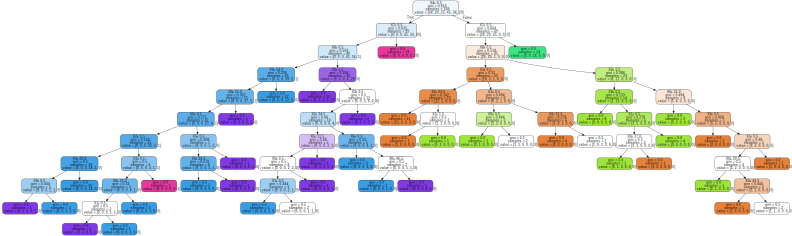

In [21]:
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(clf.fit(X_train, y_train),out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True
                       )

pydot_graph = pydotplus.graph_from_dot_data(data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"11,12!"')
pydot_graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

# Categorical Mealplan Values

In [22]:
data = pd.read_csv('../Datasets/Acumeal_New_Recipe_Database.csv')
data = data.drop('Healthy Diet Now', axis=1)
data.head()

,Age,Gender,Any_Allergies,Workout_Often,High_BP,Diabetes,Build_Muscle,Lose_Weight,Often_Hungry,Eat_Snacks,Mealplan
0,22,Male,Yes,Yes,No,No,Yes,No,Yes,Yes,2
1,40,Female,No,No,Yes,Yes,No,No,Yes,Yes,4
2,16,Male,No,No,No,No,Yes,No,Yes,No,2
3,30,Female,No,Yes,No,No,No,Yes,No,No,3
4,60,Male,Yes,Yes,Yes,No,No,Yes,No,Yes,0


In [23]:
X = data.drop('Mealplan', axis=1)
y = data['Mealplan']

#X = pd.get_dummies(data[['Age', 'Workout_Often', 'Gender', 'High_BP', 'Diabetes ', 'Build_Muscle', 'Lose_Weight', 'Metabolism']])

## Convert Inputs to Numbers

In [24]:
from sklearn.preprocessing import LabelEncoder

le_workout_often = LabelEncoder()
le_gender = LabelEncoder()
le_high_bp = LabelEncoder()
le_diabetes = LabelEncoder()
le_build_muscle = LabelEncoder()
le_lost_weight = LabelEncoder()
le_allergies_often = LabelEncoder()
le_often_hungry = LabelEncoder()
le_eat_snacks = LabelEncoder()


X['Workout_often_n'] = le_workout_often.fit_transform(X['Workout_Often'])
X['Any_Allergies_n'] = le_allergies_often.fit_transform(X['Any_Allergies'])
X['Gender_n'] = le_gender.fit_transform(X['Gender'])
X['High_BP_n'] = le_high_bp.fit_transform(X['High_BP'])
X['Diabetes_n'] = le_diabetes.fit_transform(X['Diabetes '])
X['Build_muscle_n'] = le_build_muscle.fit_transform(X['Build_Muscle'])
X['Lose_weight_n'] = le_lost_weight.fit_transform(X['Lose_Weight'])
X['Often_Hungry_n'] = le_often_hungry.fit_transform(X['Often_Hungry'])
X['Eat_Snacks'] = le_eat_snacks.fit_transform(X['Eat_Snacks'])

X.head()

,Age,Gender,Any_Allergies,Workout_Often,High_BP,Diabetes,Build_Muscle,Lose_Weight,Often_Hungry,Eat_Snacks,Workout_often_n,Any_Allergies_n,Gender_n,High_BP_n,Diabetes_n,Build_muscle_n,Lose_weight_n,Often_Hungry_n
0,22,Male,Yes,Yes,No,No,Yes,No,Yes,1,2,1,1,0,0,1,0,1
1,40,Female,No,No,Yes,Yes,No,No,Yes,1,1,0,0,1,1,0,0,1
2,16,Male,No,No,No,No,Yes,No,Yes,0,1,0,1,0,0,1,0,1
3,30,Female,No,Yes,No,No,No,Yes,No,0,2,0,0,0,0,0,1,0
4,60,Male,Yes,Yes,Yes,No,No,Yes,No,1,2,1,1,1,0,0,1,0


### Drop Categorical Columns

In [25]:
## Drop Categorical Columns
inputs_n = X.drop(['Workout_Often', 'Often_Hungry','Any_Allergies','Gender', 'High_BP', 'Diabetes ', 'Build_Muscle', 'Lose_Weight'], axis=1)
inputs_n

,Age,Eat_Snacks,Workout_often_n,Any_Allergies_n,Gender_n,High_BP_n,Diabetes_n,Build_muscle_n,Lose_weight_n,Often_Hungry_n
0,22,1,2,1,1,0,0,1,0,1
1,40,1,1,0,0,1,1,0,0,1
2,16,0,1,0,1,0,0,1,0,1
3,30,0,2,0,0,0,0,0,1,0
4,60,1,2,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
219,28,0,2,0,0,0,0,0,1,1
220,21,0,1,0,0,0,0,0,0,1
221,49,0,1,0,0,1,0,0,0,1
222,45,0,2,0,0,0,1,0,0,0


In [26]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier



# Apply (Multi-Classification) Support Vector Machine 
- SVM (Support vector machine) is an efficient classification method when the feature vector is high dimensional. In sci-kit learn, we can specify the kernel function (here, linear). 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n, y, test_size=0.2, random_state=0)

svm = SVC(kernel='linear',gamma='scale',C=1)
svm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

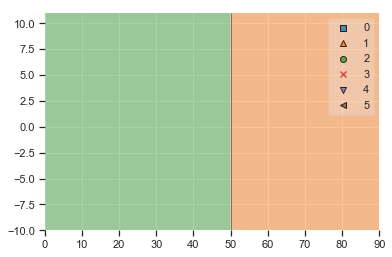

In [28]:
# Plot Decision Region using mlxtend's awesome plotting function
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


feature_values = {i:1 for i in range(1, 10)}  
feature_width = {i:1 for i in range(1, 10)}  

fig, ax = plt.subplots()
plot_decision_regions(X=X_train.values, 
                      y=y_train.values,
                      clf=svm,
                      feature_index=[0,3],                     #these one will be plotted  
                      filler_feature_values=feature_values,  #these will be ignored
                      filler_feature_ranges=feature_width,
                     ax=ax, zoom_factor=0.1)

# plt.xlabel(X.columns[0], size=14)
# plt.ylabel(X.columns[1], size=14)
# plt.title('SVM Decision Region Boundary', size=16)

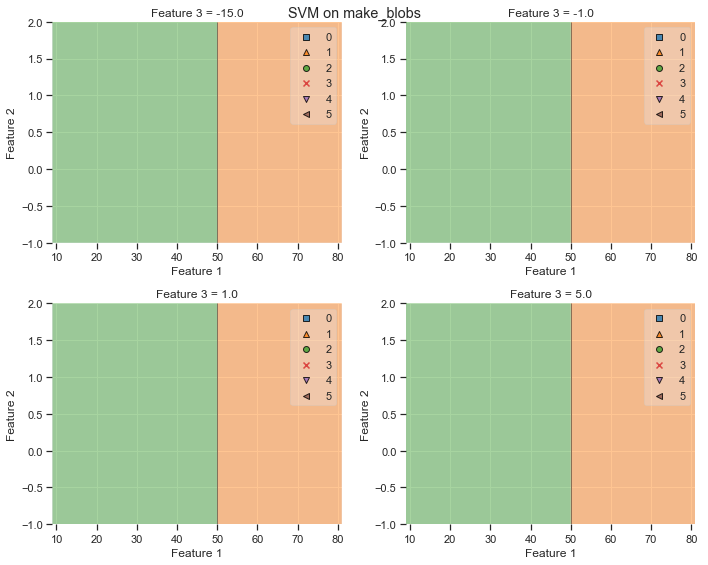

In [29]:
# Plotting decision regions
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
feature_values = {i:1 for i in range(1, 10)}  
feature_width = {i:1 for i in range(1, 10)} 
values = [-15.0, -1.0, 1.0,5.0, 30.0]

for value, ax in zip(values, axarr.flat):
    plot_decision_regions(X_train.values, y_train.values, clf=svm,
                          filler_feature_values=feature_values,
                          filler_feature_ranges=feature_width,
                           ax=ax)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
fig.suptitle('SVM on make_blobs')
plt.tight_layout()
plt.show()

## SVM Model Evaluation 

In [30]:
## Predictions
svm_predictions = svm.predict(X_test)
svm_predictions

array([4, 3, 1, 3, 0, 1, 2, 3, 5, 1, 2, 2, 3, 0, 4, 4, 5, 4, 3, 4, 5, 1,
       4, 3, 0, 4, 4, 5, 1, 3, 3, 0, 5, 3, 4, 3, 3, 5, 2, 5, 5, 5, 2, 3,
       5])

In [31]:
np.array(y_test)

array([4, 3, 1, 3, 0, 1, 2, 3, 5, 0, 2, 2, 3, 0, 4, 4, 5, 3, 3, 4, 5, 1,
       4, 3, 0, 4, 4, 5, 1, 3, 3, 0, 5, 3, 3, 3, 4, 5, 2, 5, 5, 5, 2, 3,
       5])

In [32]:
svm_predictions.shape

(45,)

### Accuracy

In [33]:
print(np.mean(np.array(svm.predict(X_test)) == y_test))

0.9111111111111111


In [34]:
# Model Accuracy
accuracy_score(y_test, svm_predictions)

0.9111111111111111

In [35]:
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[ 4,  1,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0],
       [ 0,  0,  0, 11,  2,  0],
       [ 0,  0,  0,  1,  7,  0],
       [ 0,  0,  0,  0,  0, 10]])

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score



scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
scores = cross_validate(svm,inputs_n,y, cv=10, scoring=scoring)
# print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precision score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.855
Precision score : 0.886
Recall score : 0.860
F1 score : 0.856


# Apply K-Nearest Neighbors Classifier
- KNN or k-nearest neighbours is the simplest classification algorithm. This classification algorithm does not depend on the structure of the data. Whenever a new example is encountered, its k nearest neighbours from the training data are examined. Distance between two examples can be the euclidean distance between their feature vectors. The majority class among the k nearest neighbours is taken to be the class for the encountered example.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Split training data
X_train, X_test, y_train, y_test = train_test_split(inputs_n, y, test_size=0.2, random_state=0)

# Training a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
#the value of k is non-parametric and a general rule of thumb in choosing the value of k is k = sqrt(N)/2, 
#where N stands for the number of samples in your training dataset

knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Model Evaluation

In [38]:
knn_pred = knn.predict(X_test)
knn_pred

array([4, 0, 3, 3, 0, 4, 2, 3, 0, 3, 2, 2, 4, 0, 4, 1, 2, 0, 3, 3, 5, 4,
       3, 4, 0, 4, 4, 2, 4, 4, 3, 0, 2, 3, 3, 1, 3, 5, 2, 5, 5, 3, 0, 3,
       4])

In [39]:
np.array(y_test)

array([4, 3, 1, 3, 0, 1, 2, 3, 5, 0, 2, 2, 3, 0, 4, 4, 5, 3, 3, 4, 5, 1,
       4, 3, 0, 4, 4, 5, 1, 3, 3, 0, 5, 3, 3, 3, 4, 5, 2, 5, 5, 5, 2, 3,
       5])

### Accuracy

In [40]:
print(np.mean(np.array(knn.predict(X_test)==y_test)))

0.5111111111111111


In [41]:
accuracy = accuracy_score(y_test, knn_pred)
accuracy

0.5111111111111111

## Hyper-Parameter Tuning

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score



scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}

# cross validation with 10 fold
scores = cross_validate(knn,inputs_n,y, cv=10, scoring=scoring)
# print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precision score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.479
Precision score : 0.502
Recall score : 0.464
F1 score : 0.459


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 

# Apply Random Forest Ensemble Classifier
- Random Forest is just a collection of many small Decision Trees

- Ensemble Methods are machine learning algorithms that rely on the "Wisdom of the Crowd"

- Many weak algorithms working together do better than 1 big, monolithic algorithm

- They are two major groups for ensemble methods: Random Forests and Gradient Boosted Trees

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV # hyperparameter tuning

# split the data 
X_train, X_test, y_train, y_test = train_test_split(inputs_n, y, test_size=0.2, random_state=0)

# instantiate the model 
rfc = RandomForestClassifier(n_jobs=1, n_estimators=100)

# fit the model 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [49]:
y_preds = rfc.predict(X_test)
y_preds

array([4, 3, 1, 3, 0, 1, 2, 3, 5, 1, 2, 2, 3, 0, 4, 4, 5, 4, 3, 4, 5, 1,
       4, 3, 0, 4, 4, 5, 1, 3, 3, 0, 5, 3, 4, 3, 3, 5, 2, 5, 5, 5, 2, 3,
       5])

In [50]:
np.array(y_test)

array([4, 3, 1, 3, 0, 1, 2, 3, 5, 0, 2, 2, 3, 0, 4, 4, 5, 3, 3, 4, 5, 1,
       4, 3, 0, 4, 4, 5, 1, 3, 3, 0, 5, 3, 3, 3, 4, 5, 2, 5, 5, 5, 2, 3,
       5])

### Accuracy

In [51]:
print(np.mean(np.array(rfc.predict(X_test)) == y_test))

0.9111111111111111


In [52]:
accuracy_score(y_test, y_preds)

0.9111111111111111

## Hyperparameter Tuning

In [53]:
# let's reduce the search space (number of parameters) the grid search has to go through by adjusting the grid 
# based on our best results from the last cross validation test
grid_2 ={'n_estimators': [100, 200, 500],
       'max_depth': [None],
       'max_features': ['auto', 'sqrt'],
       'min_samples_split': [6],
       'min_samples_leaf': [1, 2]}

In [54]:
# Setup RandomizedGridSearchCV
gs_rfc = GridSearchCV(estimator=rfc,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

# Fit the GridSearchCV version of clf
gs_rfc.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   1.0s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.9s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   38.6s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [55]:
# find best parameters
gs_rfc.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [56]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}

# cross validation with 10 fold
scores = cross_validate(rfc,inputs_n,y, cv=10, scoring=scoring)
# print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precision score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.842
Precision score : 0.869
Recall score : 0.841
F1 score : 0.837


### New Model after grid search

In [66]:

model = RandomForestClassifier(max_features='sqrt',
                             min_samples_leaf=2,
                             min_samples_split=6,
                             n_estimators= 200)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
# make predictions 
y_preds = model.predict(X_test)

# evaluate the predictions 
# gs_metrics = evaluate_preds(y_test, gs_y_preds)
y_preds

array([4, 3, 1, 3, 0, 1, 2, 3, 5, 1, 2, 2, 3, 0, 4, 4, 5, 4, 3, 4, 5, 1,
       4, 3, 0, 4, 4, 5, 1, 3, 3, 0, 5, 3, 4, 3, 3, 5, 2, 5, 5, 5, 2, 3,
       5])

In [68]:
np.array(y_test)

array([4, 3, 1, 3, 0, 1, 2, 3, 5, 0, 2, 2, 3, 0, 4, 4, 5, 3, 3, 4, 5, 1,
       4, 3, 0, 4, 4, 5, 1, 3, 3, 0, 5, 3, 3, 3, 4, 5, 2, 5, 5, 5, 2, 3,
       5])

In [69]:
accuracy_score(y_test, y_preds)

0.9111111111111111

## Final Random Forest Classifier Model

In [70]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}

# cross validation with 10 fold
scores = cross_validate(model,inputs_n,y, cv=10, scoring=scoring)
# print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precision score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.855
Precision score : 0.887
Recall score : 0.854
F1 score : 0.852


# Gradient Boosting Classifier
Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

# split data
X_train, X_test, y_train, y_test = train_test_split(inputs_n, y, test_size=0.2, random_state=0)


gradientboostingc = GradientBoostingClassifier()

# evaluate the model 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
n_scores = cross_val_score(gradientboostingc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.824 (0.089)


## Hyperparameter Tuning

In [159]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}

# cross validation with 10 fold
scores = cross_validate(gradientboostingc,inputs_n,y, cv=10, scoring=scoring)
# print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precision score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.829
Precision score : 0.853
Recall score : 0.828
F1 score : 0.819


# Export Model 

In [91]:
import pickle 

pickle.dump(gradientboostingc, open("gradient_boosting.pkl", "wb")) 

In [113]:
pickle.dump(clf,open('decisiontree2.pkl', 'wb'))

In [162]:
import pickle
pickle.dump(rfc, open('random_forest.pkl', 'wb'))